<ipython-input-20-4c6db2e04d32>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_period_downsample['time_numeric'] = first_period_downsample['date__time'].astype(int)


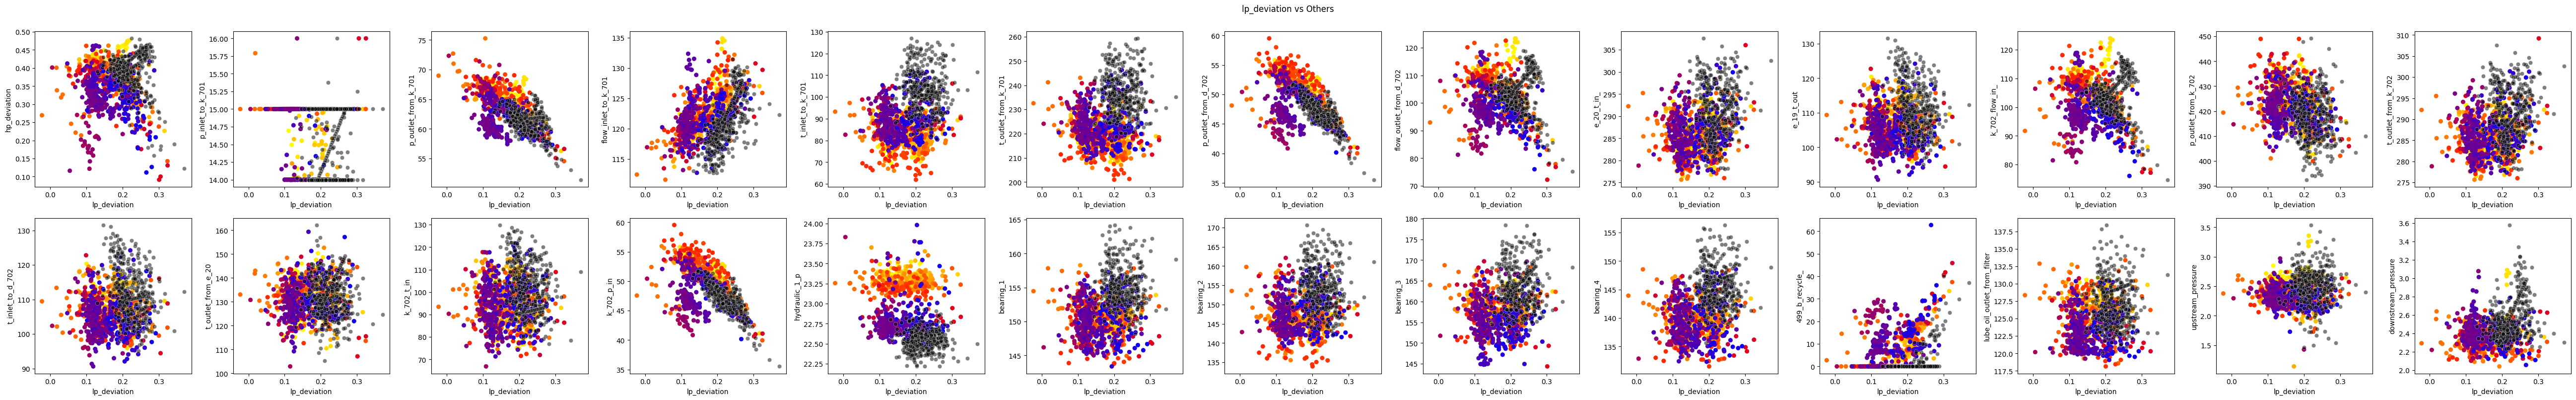

In [ ]:
import math
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# Convert date__time to timestamp
first_period_downsample['time_numeric'] = first_period_downsample['date__time'].astype(int)

# List of numeric columns, excluding time_numeric and condition
all_columns = [col for col in first_period_downsample.columns
               if first_period_downsample[col].dtype == 'float64'
               and col not in ['time_numeric', 'condition']]

# Make sure lp_deviation is in the dataframe and remove it from secondary columns
assert "lp_deviation" in all_columns
secondary_columns = [col for col in all_columns if col != "lp_deviation"]

# Calculate number of rows required based on 13 plots per row
num_rows = math.ceil(len(secondary_columns) / 13)

subplot_size = 4  # Size for each subplot in inches
fig_width = 13 * subplot_size  # Total width based on 13 subplots per row
fig_height = num_rows * subplot_size  # Total height based on number of rows

fig, axes = plt.subplots(num_rows, 13, figsize=(fig_width, fig_height))

# Creating a custom color palette
colors = ["yellow", "orange", "red", "blue", "purple"]
cmap = mcolors.LinearSegmentedColormap.from_list("custom", colors, N = 256)

for idx, secondary_col in enumerate(secondary_columns):
    i = idx // 13
    j = idx % 13
    ax = axes[i, j]

    # Scatter plot with hue based on time progression
    scatter = sns.scatterplot(
        data=first_period_downsample,
        x = "lp_deviation",
        y=secondary_col,
        hue = 'time_numeric',
        palette=cmap, # use custom palette
        edgecolor=None,
        ax=ax
    )

    # Overlaying the reference data points in black color
    sns.scatterplot(
        data=reference_2010_july_downsample,
        x="lp_deviation",
        y=secondary_col,
        color='black',
        alpha=0.5,
        legend=False,
        ax=ax
    )

    scatter.get_legend().remove()
    ax.set_ylabel(secondary_col)
    ax.set_xlabel("lp_deviation")
# Normalize
# Turn off axes for empty subplots
for idx in range(len(secondary_columns), num_rows * 13):
    i = idx // 13
    j = idx % 13
    axes[i, j].axis('off')

plt.suptitle("lp_deviation vs Others", y = 1.001)
plt.tight_layout()
plt.show()
